In [264]:
import skimage
from skimage import io
from skimage import feature
from skimage import measure
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import os
import glob
import pandas as pd
import numpy as np

In [265]:
### the data maxes out my Dropbox, so you'll have to modify this...

trainfolder="/Users/gus/CDIPS/nerve-project/train/"
datafolder="/Users/gus/CDIPS/nerve-project/"
trainimages = glob.glob(os.path.join(trainfolder, '*.tif'))

In [266]:
training = pd.read_csv(os.path.join(datafolder,'train_masks.csv'))
non_empty=training[ ~pd.isnull(training.pixels)][['subject','img']]
empty=training[ pd.isnull(training.pixels)][['subject','img']]

In [267]:
def load_image(idx, training):
    nameformat = '{subject}_{img}.tif'
    maskformat = '{subject}_{img}_mask.tif'
    #skimage.io.imread(os.path.join(imagefolder,''))
    imagefile = nameformat.format(subject=training['subject'][idx],
                              img=training['img'][idx])
    maskfile = maskformat.format(subject=training['subject'][idx],
                              img=training['img'][idx])
    image = io.imread(os.path.join(trainfolder, imagefile))
    mask = io.imread(os.path.join(trainfolder, maskfile))   
    return (image, mask, imagefile)

In [268]:
class image_pair(object):
    
    def __init__(self,subject,img_number):
        nameformat = '{subject}_{img}.tif'
        maskformat = '{subject}_{img}_mask.tif'
        imagefile = nameformat.format(subject=subject,
                              img=img_number)
        maskfile = maskformat.format(subject=subject,
                              img=img_number)
        self.img_number = img_number
        self.subject = subject
        self.image = io.imread(os.path.join(trainfolder, imagefile))
        self.mask = io.imread(os.path.join(trainfolder, maskfile))   
        self.dims = self.image.shape
        self.contour = measure.find_contours(self.mask, 254.5)[0]
        
    def plot(self,figure_size=(6,4)):
        title = '{subject}_{img}.tif'
        title=title.format(subject=self.subject,img=self.img_number)
        fig, ax = plt.subplots(figsize=figure_size)
        ax.imshow(self.image, cmap=plt.cm.gray)
        maskcontour = [self.contour]
        if not maskcontour==[]:
            ax.plot(maskcontour[0][:,1], maskcontour[0][:,0], linewidth=2)
            ax.set_title(title)
        else:
                ax.set_title(title + ' (no region)', fontsize=18)
        ax.set_aspect('equal')
        ax.autoscale(tight=True)
        return ax
        

In [269]:
im=image_pair(1,3)

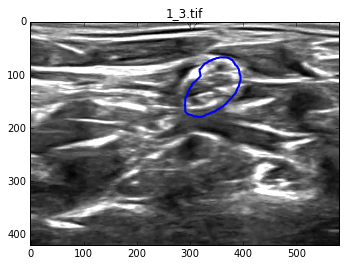

In [270]:
im.plot()

In [271]:
def get_patch(image,pixel,F):
        hor_range = (pixel[0]-F,pixel[0]+F+1)
        ver_range= (pixel[1]-F,pixel[1]+F+1)
        return image[hor_range[0]:hor_range[1],ver_range[0]:ver_range[1]]

In [272]:
def write_patch(patch,target_directory,subject,img,sample_number):
    name_format='sample_{sub}_{img}_{smp}'
    path = target_directory + name_format.format(sub=subject,img=img,smp=sample_number)
    np.savetxt(path,patch)

In [273]:
def sample_from_image(P,F,image_pair,target_directory):
    img = image_pair.image
    width,height = image_pair.dims
    contour=image_pair.contour
    total_pixels = contour.shape[0]
    sample_pixels = np.random.randint(0,total_pixels, size=P)
    for sample_num,p in enumerate(sample_pixels):
        #print sample_num
        patch = get_patch(img,contour[p],F)
        write_patch(patch,target_directory,image_pair.subject,image_pair.img_number,sample_num)
    

In [274]:
pat=get_patch(im.image,(200,180),2)

In [275]:
sample_pixels = np.random.randint(0,20, 10)

In [276]:
# have ~2000 non-null images, let's sample from 100 of them. From each of 
# these, let's take 100 pixels.

In [277]:
target='/Users/gus/CDIPS/nerve-project/samples/'

In [286]:
def sample_positive_patches(num_images,P,F,target_directory):
    sample_images=non_empty.sample(num_images)
    ind = np.array(sample_images)
    for i in range(num_images):
        im_pair = image_pair(ind[i,0],ind[i,1])
        sample_from_image(P,F,im_pair,target_directory)

In [290]:
time sample_positive_patches(100,100,17,target)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


CPU times: user 15.4 s, sys: 2.85 s, total: 18.2 s
Wall time: 19.1 s


In [306]:
patch1 = np.loadtxt('/Users/gus/CDIPS/nerve-project/samples/sample_20_43_31')
patch2 = np.loadtxt('/Users/gus/CDIPS/nerve-project/samples/sample_20_43_3')

In [301]:
patch1

array([[ 163.,  165.,  168., ...,  204.,  201.,  200.],
       [ 180.,  185.,  191., ...,  220.,  217.,  214.],
       [ 189.,  196.,  204., ...,  222.,  208.,  213.],
       ..., 
       [ 190.,  192.,  184., ...,  164.,  164.,  163.],
       [ 169.,  171.,  169., ...,  147.,  149.,  148.],
       [ 170.,  172.,  162., ...,  142.,  143.,  142.]])

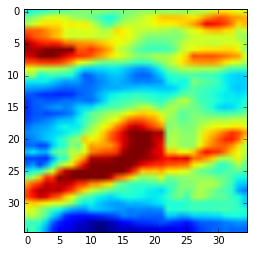

In [304]:
plt.imshow(patch1)

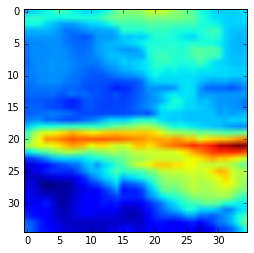

In [307]:
plt.imshow(patch2)